**THIS IS NOT FINANCIAL ADVICE. DO YOUR OWN RESEARCH. USE AT YOUR OWN RISK.**

# Chapter 2: Individual security returns

Based on [Analyzing Financial Data and Implementing Financial Models Using R](https://www.amazon.com/Analyzing-Financial-Implementing-Springer-Economics/dp/3030641546) by Clifford S. Ang (Springer), 1st edition. There's a 2nd edition but I don't have it.

We're using Python instead of R.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

# Cache API calls
import requests_cache

In [2]:
session = requests_cache.CachedSession("yfinance.cache")
session.headers["User-Agent"] = "prices-notebook/1.0"

# Realty Income Corporation, a REIT
o = yf.Ticker("O", session=session)

## 2.1 Price returns

The price return is the percentage change in the closing price of a security. For example, if a security goes from \\$100 to \\$120 over some time period, then the price return is 20%.

$$ PRet_t = \frac{P_t - P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}} - 1$$

Price returns include capital gains, and exclude intermediate cash flows such as stock dividends or bond coupons.

The `Close` column is unadjusted for splits and dividends.

In [3]:
o_df = o.history(start="2021-12-01", end="2022-01-05", auto_adjust=False, back_adjust=False)
o_df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2021-12-01,68.449997,69.089996,65.900002,65.919998,65.693573,6009300,0.000,0
2021-12-02,66.550003,68.059998,66.419998,67.519997,67.288078,5086200,0.000,0
2021-12-03,67.580002,67.879997,66.830002,67.250000,67.019005,4045500,0.000,0
2021-12-06,67.769997,69.580002,67.709999,68.080002,67.846161,5604700,0.000,0
2021-12-07,68.400002,68.879997,68.040001,68.389999,68.155090,6229000,0.000,0
2021-12-08,68.349998,69.089996,68.239998,68.849998,68.613510,4298400,0.000,0
2021-12-09,68.519997,68.519997,67.339996,67.360001,67.128632,3697900,0.000,0
2021-12-10,67.809998,67.809998,66.889999,66.940002,66.710075,3873900,0.000,0
2021-12-13,66.989998,68.470001,66.849998,68.160004,67.925888,4984500,0.000,0


In [4]:
# Discard OHLV and splits as we don't need those.
# We'll keep the adjusted close price so we can compare to the close price following
# the dividend distribution.
o_df = o_df.loc[:, ["Close", "Adj Close", "Dividends"]]
o_df

,Close,Adj Close,Dividends
Date,,,
2021-12-01,65.919998,65.693573,0.000
2021-12-02,67.519997,67.288078,0.000
2021-12-03,67.250000,67.019005,0.000
2021-12-06,68.080002,67.846161,0.000
2021-12-07,68.389999,68.155090,0.000
2021-12-08,68.849998,68.613510,0.000
2021-12-09,67.360001,67.128632,0.000
2021-12-10,66.940002,66.710075,0.000
2021-12-13,68.160004,67.925888,0.000


In [5]:
# Calculate price return.
# Pandas has a ready-made pct_change() function for this.
# fillna(0) handles the first date, where pct_change() is undefined.
o_df["PriceReturn"] = o_df["Close"].pct_change().fillna(0)
o_df

,Close,Adj Close,Dividends,PriceReturn
Date,,,,
2021-12-01,65.919998,65.693573,0.000,0.000000
2021-12-02,67.519997,67.288078,0.000,0.024272
2021-12-03,67.250000,67.019005,0.000,-0.003999
2021-12-06,68.080002,67.846161,0.000,0.012342
2021-12-07,68.389999,68.155090,0.000,0.004553
2021-12-08,68.849998,68.613510,0.000,0.006726
2021-12-09,67.360001,67.128632,0.000,-0.021641
2021-12-10,66.940002,66.710075,0.000,-0.006235
2021-12-13,68.160004,67.925888,0.000,0.018225


The [ex-dividend date](https://www.investopedia.com/terms/e/ex-date.asp) (or _ex-date_) is 2021-12-31.
Notice that before the ex-date, the adjusted close price is lower than the close price, basically in preparation for the price drop on the ex-date. On the ex-date, the two line up. The stock price generally declines by the amount of the dividend on the ex-date.

## 2.2 Total returns

Also known as _holding period returns_. This includes both the capital gain and intermediate cash flows. The _total return_ $R_t$ is given by

$$
R_t 
  = \frac{P_t - P_{t-1} + CF_t}{P_{t-1}} 
  = \underbrace{ \left[ \frac{P_t}{P_{t-1}} - 1 \right]}_\text{Capital gain}
    + \underbrace{ \frac{CF_t}{P_{t-1}} }_\text{CF yield}
$$

(Note that the equation above corrects an error in the book.)

In [6]:
# Below:
# - Price return is the capital yield
# - Dividend over previous close is the cash flow yield
o_df["TotalReturn"] = (o_df["PriceReturn"] + o_df["Dividends"] / o_df["Close"].shift(1)).fillna(0)
o_df

,Close,Adj Close,Dividends,PriceReturn,TotalReturn
Date,,,,,
2021-12-01,65.919998,65.693573,0.000,0.000000,0.000000
2021-12-02,67.519997,67.288078,0.000,0.024272,0.024272
2021-12-03,67.250000,67.019005,0.000,-0.003999,-0.003999
2021-12-06,68.080002,67.846161,0.000,0.012342,0.012342
2021-12-07,68.389999,68.155090,0.000,0.004553,0.004553
2021-12-08,68.849998,68.613510,0.000,0.006726,0.006726
2021-12-09,67.360001,67.128632,0.000,-0.021641,-0.021641
2021-12-10,66.940002,66.710075,0.000,-0.006235,-0.006235
2021-12-13,68.160004,67.925888,0.000,0.018225,0.018225


Notice that the price return and total return are the same until the ex-date, 2021-12-31.

## 2.3 Logarithmic total returns 

A motivation for using log total returns is that the values are almost identical to total returns, but the calculation is simpler when calculating cumulative returns.

For log total returns, we use total returns based on the _adjusted_ closing price $P_t$. The _logarithmic total return_ $r_t$ is given by

\begin{align}
r_t &= \ln{(1 + R_t)} \\
    &= \ln{\frac {P_t} {P_{t-1}}} \\
    &= \ln{P_t} - \ln{P_{t-1}} \\
\end{align}

In [7]:
o_df["LogTotalReturn"] = (np.log(o_df["Adj Close"]) - np.log(o_df["Adj Close"].shift(1))).fillna(0)
o_df

,Close,Adj Close,Dividends,PriceReturn,TotalReturn,LogTotalReturn
Date,,,,,,
2021-12-01,65.919998,65.693573,0.000,0.000000,0.000000,0.000000
2021-12-02,67.519997,67.288078,0.000,0.024272,0.024272,0.023982
2021-12-03,67.250000,67.019005,0.000,-0.003999,-0.003999,-0.004007
2021-12-06,68.080002,67.846161,0.000,0.012342,0.012342,0.012267
2021-12-07,68.389999,68.155090,0.000,0.004553,0.004553,0.004543
2021-12-08,68.849998,68.613510,0.000,0.006726,0.006726,0.006704
2021-12-09,67.360001,67.128632,0.000,-0.021641,-0.021641,-0.021879
2021-12-10,66.940002,66.710075,0.000,-0.006235,-0.006235,-0.006255
2021-12-13,68.160004,67.925888,0.000,0.018225,0.018225,0.018061


Note that arithmetic total returns and log total returns are nearly identical.

## 2.4 Cumulating multi-day returns 

### 2.4.1 Cumulating arithmetic returns

A cumulating arithmetic return is the product of daily gross returns:

$$ R_{1 \text{ to } T} = (1 + R_1) \times (1 + R_2) \times \cdots \times (1 + R_T) $$

In [8]:
o_df["GrossTotalReturn"] = 1.0 + o_df["TotalReturn"]
o_df["GrossCumTotalReturn"] = o_df["GrossTotalReturn"].cumprod()
o_df["NetCumTotalReturn"] = o_df["GrossCumTotalReturn"] - 1.0
o_df

,Close,Adj Close,Dividends,PriceReturn,TotalReturn,LogTotalReturn,GrossTotalReturn,GrossCumTotalReturn,NetCumTotalReturn
Date,,,,,,,,,
2021-12-01,65.919998,65.693573,0.000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
2021-12-02,67.519997,67.288078,0.000,0.024272,0.024272,0.023982,1.024272,1.024272,0.024272
2021-12-03,67.250000,67.019005,0.000,-0.003999,-0.003999,-0.004007,0.996001,1.020176,0.020176
2021-12-06,68.080002,67.846161,0.000,0.012342,0.012342,0.012267,1.012342,1.032767,0.032767
2021-12-07,68.389999,68.155090,0.000,0.004553,0.004553,0.004543,1.004553,1.037470,0.037470
2021-12-08,68.849998,68.613510,0.000,0.006726,0.006726,0.006704,1.006726,1.044448,0.044448
2021-12-09,67.360001,67.128632,0.000,-0.021641,-0.021641,-0.021879,0.978359,1.021845,0.021845
2021-12-10,66.940002,66.710075,0.000,-0.006235,-0.006235,-0.006255,0.993765,1.015473,0.015473
2021-12-13,68.160004,67.925888,0.000,0.018225,0.018225,0.018061,1.018225,1.033981,0.033981


### 2.4.2 Cumulating logarithmic returns

As an alternative to the cumulative arithmetic returns, we can sum the daily logrithmic returns.

\begin{align}
r_{1 \text{ to } T} &= \ln{R_{1 \text{ to } T}} \\
    &= \ln{((1 + R_1) \times (1 + R_2) \times \cdots \times (1 + R_T))} \\
    &= \ln{(1 + R_1)} + \ln{(1 + R_2)} + \cdots + \ln{(1 + R_T)} \\
    &= r_1 + r_2 + \cdots + r_T \\
    &= \sum_{t=1}^{T}{r_t}
\end{align}

In [9]:
o_df["NetCumTotalReturn2"] = np.exp(o_df["LogTotalReturn"].cumsum()) - 1.0
o_df

,Close,Adj Close,Dividends,PriceReturn,TotalReturn,LogTotalReturn,GrossTotalReturn,GrossCumTotalReturn,NetCumTotalReturn,NetCumTotalReturn2
Date,,,,,,,,,,
2021-12-01,65.919998,65.693573,0.000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
2021-12-02,67.519997,67.288078,0.000,0.024272,0.024272,0.023982,1.024272,1.024272,0.024272,0.024272
2021-12-03,67.250000,67.019005,0.000,-0.003999,-0.003999,-0.004007,0.996001,1.020176,0.020176,0.020176
2021-12-06,68.080002,67.846161,0.000,0.012342,0.012342,0.012267,1.012342,1.032767,0.032767,0.032767
2021-12-07,68.389999,68.155090,0.000,0.004553,0.004553,0.004543,1.004553,1.037470,0.037470,0.037470
2021-12-08,68.849998,68.613510,0.000,0.006726,0.006726,0.006704,1.006726,1.044448,0.044448,0.044448
2021-12-09,67.360001,67.128632,0.000,-0.021641,-0.021641,-0.021879,0.978359,1.021845,0.021845,0.021845
2021-12-10,66.940002,66.710075,0.000,-0.006235,-0.006235,-0.006255,0.993765,1.015473,0.015473,0.015473
2021-12-13,68.160004,67.925888,0.000,0.018225,0.018225,0.018061,1.018225,1.033981,0.033981,0.033981


### 2.4.3 Comparing price return and total return 

In [10]:
o_df["GrossCumPriceReturn"] = (1.0 + o_df["PriceReturn"]).cumprod()

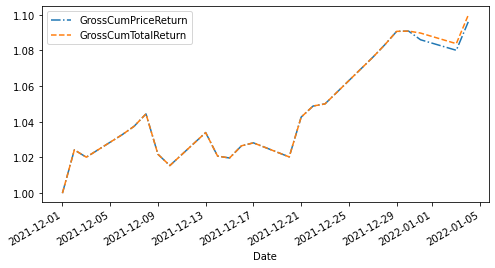

In [11]:
o_df[["GrossCumPriceReturn", "GrossCumTotalReturn"]].plot(style=['-.', '--'], figsize=(8, 4))
plt.show()

## 2.5 Weekly returns

First, let's clean up the data frame. All we need is the adjusted close.

In [12]:
o_df = o_df[["Adj Close"]]
o_df.head()

,Adj Close
Date,
2021-12-01,65.693573
2021-12-02,67.288078
2021-12-03,67.019005
2021-12-06,67.846161
2021-12-07,68.155090


Now we'll resample to a weekly interval, ending each Friday.

In [13]:
o_df = o_df.resample("W-FRI").last()
o_df

,Adj Close
Date,
2021-12-03,67.019005
2021-12-10,66.710075
2021-12-17,67.547188
2021-12-24,68.982239
2021-12-31,71.589996
2022-01-07,72.250000


In [14]:
o_df["TotalReturn"] = (o_df["Adj Close"] / o_df["Adj Close"].shift(1) - 1.0).fillna(0)
o_df["GrossTotalReturn"] = 1.0 + o_df["TotalReturn"]
o_df["GrossCumTotalReturn"] = o_df["GrossTotalReturn"].cumprod()
o_df["NetCumTotalReturn"] = o_df["GrossCumTotalReturn"] - 1.0
o_df

,Adj Close,TotalReturn,GrossTotalReturn,GrossCumTotalReturn,NetCumTotalReturn
Date,,,,,
2021-12-03,67.019005,0.000000,1.000000,1.000000,0.000000
2021-12-10,66.710075,-0.004610,0.995390,0.995390,-0.004610
2021-12-17,67.547188,0.012549,1.012549,1.007881,0.007881
2021-12-24,68.982239,0.021245,1.021245,1.029294,0.029294
2021-12-31,71.589996,0.037803,1.037803,1.068204,0.068204
2022-01-07,72.250000,0.009219,1.009219,1.078052,0.078052


## 2.6 Monthly returns

Calculating monthly returns is essentially the same as calculating weekly returns, but we'll need a bigger data set.

In [15]:
o_df = o.history(start="2021-01-01", end="2022-01-01", auto_adjust=False, back_adjust=False)
o_df = o_df[["Adj Close"]]
o_df.head()

,Adj Close
Date,
2021-01-04,55.409851
2021-01-05,55.687557
2021-01-06,55.215473
2021-01-07,54.521229
2021-01-08,55.298779


In [16]:
o_df = o_df.resample("M").last()
o_df

,Adj Close
Date,
2021-01-31,54.880932
2021-02-28,56.210484
2021-03-31,59.450653
2021-04-30,64.960609
2021-05-31,64.478195
2021-06-30,63.132637
2021-07-31,66.714973
2021-08-31,68.772049
2021-09-30,61.984909


In [17]:
o_df["TotalReturn"] = (o_df["Adj Close"] / o_df["Adj Close"].shift(1) - 1.0).fillna(0)
o_df["GrossTotalReturn"] = 1.0 + o_df["TotalReturn"]
o_df["GrossCumTotalReturn"] = o_df["GrossTotalReturn"].cumprod()
o_df["NetCumTotalReturn"] = o_df["GrossCumTotalReturn"] - 1.0
o_df

,Adj Close,TotalReturn,GrossTotalReturn,GrossCumTotalReturn,NetCumTotalReturn
Date,,,,,
2021-01-31,54.880932,0.000000,1.000000,1.000000,0.000000
2021-02-28,56.210484,0.024226,1.024226,1.024226,0.024226
2021-03-31,59.450653,0.057644,1.057644,1.083266,0.083266
2021-04-30,64.960609,0.092681,1.092681,1.183664,0.183664
2021-05-31,64.478195,-0.007426,0.992574,1.174874,0.174874
2021-06-30,63.132637,-0.020868,0.979132,1.150357,0.150357
2021-07-31,66.714973,0.056743,1.056743,1.215631,0.215631
2021-08-31,68.772049,0.030834,1.030834,1.253114,0.253114
2021-09-30,61.984909,-0.098690,0.901310,1.129443,0.129443


Here's another way to calculate gross cumulative total returns:

In [18]:
o_df["GrossCumTotalReturn2"] = o_df["Adj Close"].div(o_df["Adj Close"].iloc[0])
o_df

,Adj Close,TotalReturn,GrossTotalReturn,GrossCumTotalReturn,NetCumTotalReturn,GrossCumTotalReturn2
Date,,,,,,
2021-01-31,54.880932,0.000000,1.000000,1.000000,0.000000,1.000000
2021-02-28,56.210484,0.024226,1.024226,1.024226,0.024226,1.024226
2021-03-31,59.450653,0.057644,1.057644,1.083266,0.083266,1.083266
2021-04-30,64.960609,0.092681,1.092681,1.183664,0.183664,1.183664
2021-05-31,64.478195,-0.007426,0.992574,1.174874,0.174874,1.174874
2021-06-30,63.132637,-0.020868,0.979132,1.150357,0.150357,1.150357
2021-07-31,66.714973,0.056743,1.056743,1.215631,0.215631,1.215631
2021-08-31,68.772049,0.030834,1.030834,1.253114,0.253114,1.253114
2021-09-30,61.984909,-0.098690,0.901310,1.129443,0.129443,1.129443


## 2.7 Comparing performance of multiple securities: total returns

Now we'll compare total returns for a number of tickers that had interesting price movements during the COVID-19 pandemic. We'll start with 2020-03-23, which was when the market experienced significant price drops.

In [19]:
def compare_total_returns(symbols, start, end, title):
    cols = []
    for symbol in symbols:
        ticker = yf.Ticker(symbol, session=session)
        hist_df = ticker.history(start=start, end=end, auto_adjust=False, back_adjust=False)
        cols.append(hist_df["Adj Close"].rename(symbol))
    comb_df = pd.concat(cols, axis=1)
    norm_df = comb_df.div(comb_df.iloc[0])
    norm_df.plot(title=title, figsize=(10, 6))
    plt.show()

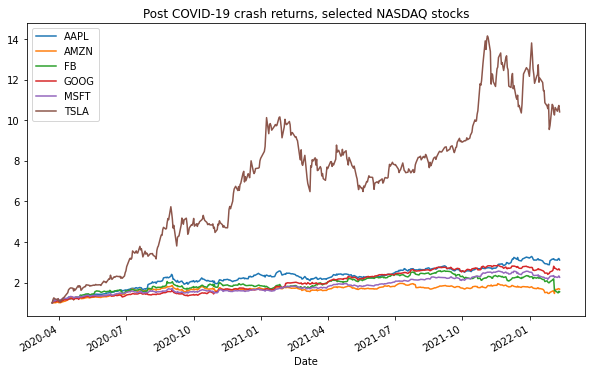

In [20]:
symbols = [
    "AAPL",
    "AMZN",
    "FB",
    "GOOG",
    "MSFT",
    "TSLA",
]
compare_total_returns(symbols, "2020-03-23", "2022-02-11", "Post COVID-19 crash returns, selected NASDAQ stocks")

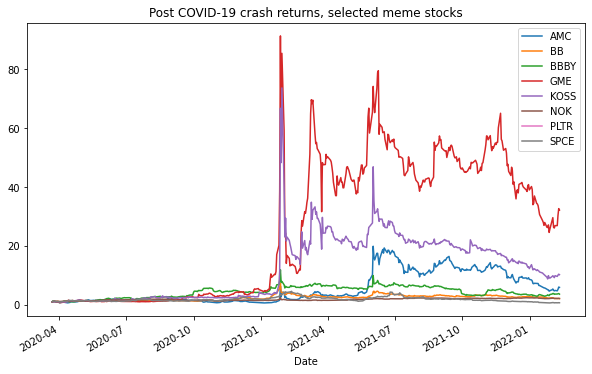

In [21]:
symbols = [
    "AMC",
    "BB",
    "BBBY",
    "GME",
    "KOSS",
    "NOK",
    "PLTR",
    "SPCE",
]
compare_total_returns(symbols, "2020-03-23", "2022-02-11", "Post COVID-19 crash returns, selected meme stocks")

## Questions for further study 

- Why are log total returns a good approximation of total returns?